# Task 01

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

dataset = load_diabetes()
X = dataset.data
Y = dataset.target

X_BMI = X[:, np.newaxis, 2] # Extracting the BMI feature (3rd column) and making it 2D for model
print(X_BMI.shape) # Returns a 2D array 

df = pd.DataFrame({'BMI': X_BMI.flatten(), 'Progression': Y}) # again flatten to make 1D for DataFrame
df


(442, 1)


,BMI,Progression
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
...,...,...
437,0.019662,178.0
438,-0.015906,104.0
439,-0.015906,132.0
440,0.039062,220.0


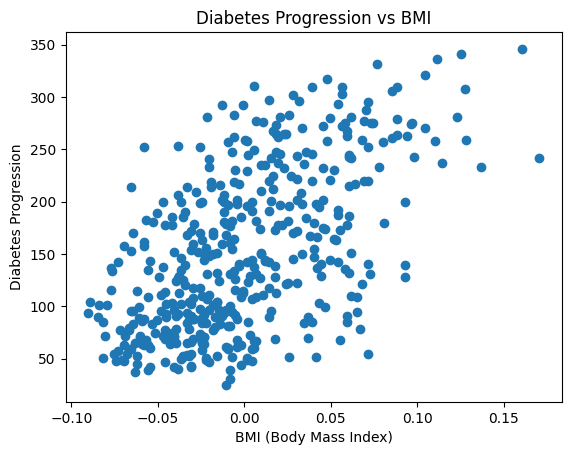

                 BMI  Progression
BMI          1.00000      0.58645
Progression  0.58645      1.00000


In [13]:
import matplotlib.pyplot as plt

plt.subplot(1,1,1)
plt.scatter(df['BMI'], df['Progression'])
plt.title('Diabetes Progression vs BMI')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Diabetes Progression')
plt.show()

correlation = df.corr()
print(correlation)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(
    X_BMI, Y, test_size=0.2, random_state=42
)

In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [16]:
Y_pred

array([145.80622687, 188.85739048, 147.95878505, 203.92529774,
       131.8145987 , 127.50948234, 322.31599764, 197.4676232 ,
        61.85645785, 167.33180868, 118.89924962,  94.14483055,
        90.91599328, 166.25552959,  96.29738873, 157.64529687,
       223.29832136, 240.5187868 , 180.24715776, 210.38297228,
       191.00994866, 109.21273781, 102.75506327, 174.86576231,
       196.39134411, 166.25552959, 211.45925137, 133.96715688,
        78.0006442 , 130.73831961, 244.82390316, 114.59413326,
       166.25552959, 145.80622687, 192.08622775, 229.7559959 ,
       121.0518078 , 118.89924962, 121.0518078 ,  94.14483055,
        82.30576056, 122.12808689, 129.66204052, 118.89924962,
       107.06017963, 116.74669144, 115.67041235, 101.67878418,
        67.2378533 , 153.34018051, 210.38297228,  82.30576056,
       169.48436686, 111.36529599, 133.96715688, 216.84064682,
       105.98390054, 213.61180955, 133.96715688,  97.37366782,
       182.39971594, 193.16250684, 206.07785592, 107.06

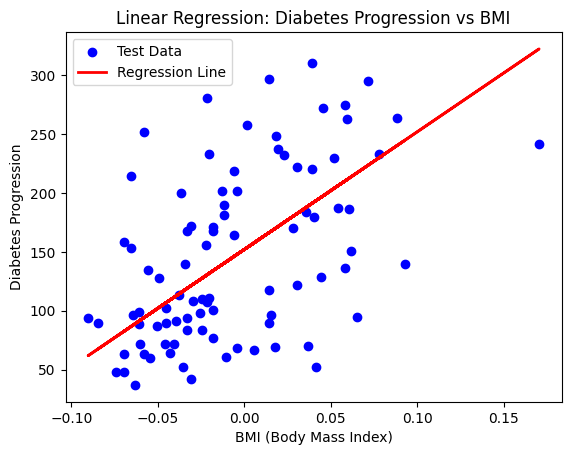

In [18]:
plt.scatter(X_test, Y_test, color='blue', label='Test Data')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Diabetes Progression vs BMI')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("--- Model Evaluation Metrics ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


--- Model Evaluation Metrics ---
Mean Squared Error (MSE): 4061.83
R-squared (R2): 0.23


# Q1 Does BMI alone explain most of the variation in disease progression? 

No, BMI alone does not explain most of the variation in disease progression.The key metric that indicates this is the $\text{R}^2$ score. The $\text{R}^2$ we are getting is 0.23 which is 23% only.

# Q2 How does R² help explain this?

The $\text{R}^2$ score (Coefficient of Determination) represents the proportion of the variance in the dependent variable (Disease Progression) that is predictable from the independent variable(s) (BMI).

1. An $\text{R}^2$ of 1.0 (or 100%) means the model perfectly explains all the variance.
2. An $\text{R}^2$ of 0.0 (or 0%) means the model explains none of the variance.

Since the $\text{R}^2$ is 0.23:$$\text{R}^2 \approx 0.23 \implies 23\%$$This means that only about 23% of the variability in the diabetes disease progression can be explained by BMI alone. The remaining 65% of the variability is due to other factors (like age, sex, blood pressure, cholesterol, etc.) that are not included in this simple model. The low $\text{R}^2$ confirms that the relationship is linear but weak, and a simple linear regression with only BMI is insufficient to accurately predict the outcome.